In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
print('Nguyễn Thị Tường Vi - 6351071077')
data = pd.read_csv(r'c:\Users\PC\Downloads\heart.csv')

Nguyễn Thị Tường Vi - 6351071077


In [5]:
X = data.drop('target', axis=1)  
y = data['target'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Số lượng dữ liệu huấn luyện:", X_train.shape[0])
print("Số lượng dữ liệu kiểm thử:", X_test.shape[0])


Số lượng dữ liệu huấn luyện: 212
Số lượng dữ liệu kiểm thử: 91


In [6]:
print('Nguyễn Thị Tường Vi - 6351071077')
correlation_matrix = X_train.corr(method='pearson')
print(correlation_matrix)

Nguyễn Thị Tường Vi - 6351071077
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.076955 -0.127758  0.288078  0.247557  0.121209   
sex      -0.076955  1.000000 -0.057577 -0.110884 -0.212008  0.034951   
cp       -0.127758 -0.057577  1.000000  0.025663 -0.072715  0.186225   
trestbps  0.288078 -0.110884  0.025663  1.000000  0.146431  0.226035   
chol      0.247557 -0.212008 -0.072715  0.146431  1.000000  0.051839   
fbs       0.121209  0.034951  0.186225  0.226035  0.051839  1.000000   
restecg  -0.165419 -0.074695 -0.031449 -0.065109 -0.118689 -0.098113   
thalach  -0.404615 -0.038822  0.317051 -0.032537  0.009340 -0.013058   
exang     0.161146  0.151385 -0.390310  0.071371  0.039480 -0.020018   
oldpeak   0.204483  0.176680 -0.165942  0.103757  0.122876 -0.002365   
slope    -0.151790 -0.066913  0.124755 -0.033806  0.014369 -0.074125   
ca        0.330450  0.169985 -0.167850  0.058233  0.057201  0.084714   
thal      0.081448  0.225652 -0

Nguyễn Thị Tường Vi - 6351071077


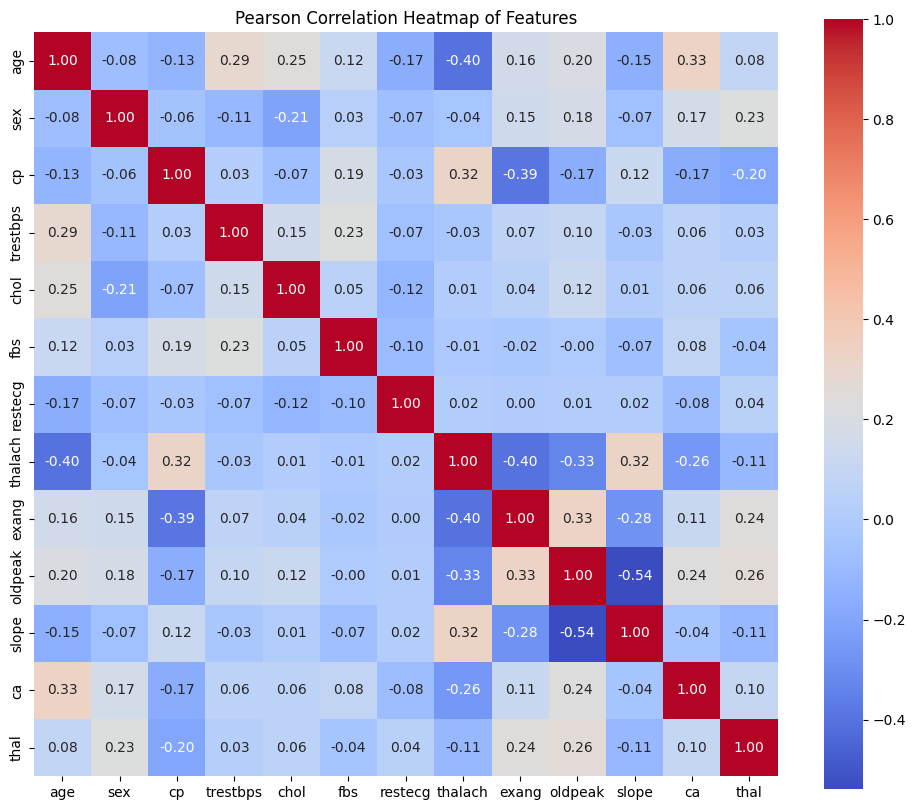

In [7]:
print('Nguyễn Thị Tường Vi - 6351071077')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Pearson Correlation Heatmap of Features")
plt.show()

In [8]:
print('Nguyễn Thị Tường Vi')
features = data.drop('target', axis=1) 
labels = data['target']

Nguyễn Thị Tường Vi


In [9]:
print('Nguyễn Thị Tường Vi - 6351071077')
features.select_dtypes(exclude=['int64']).columns

Nguyễn Thị Tường Vi - 6351071077


Index(['oldpeak'], dtype='object')

In [10]:
print('Nguyễn_Thị_Tường_Vi_6351071077')
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot    

Nguyễn_Thị_Tường_Vi_6351071077


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,...,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


In [11]:
X_train = features_onehot[: 212]
X_test = features_onehot[91:]
y_train = labels [:212]
y_test = labels [91:]

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
print('Nguyễn Thị Tường Vi - 6351071077')

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

Nguyễn Thị Tường Vi - 6351071077


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
from sklearn import metrics

print('Nguyễn Thị Tường Vi - 6351071077')
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Nguyễn Thị Tường Vi - 6351071077
Accuracy: 0.8207547169811321
Report:               precision    recall  f1-score   support

           0       1.00      0.72      0.84       138
           1       0.66      1.00      0.80        74

    accuracy                           0.82       212
   macro avg       0.83      0.86      0.82       212
weighted avg       0.88      0.82      0.82       212



In [15]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)


Nguyễn Thị Tường Vi-6351071077


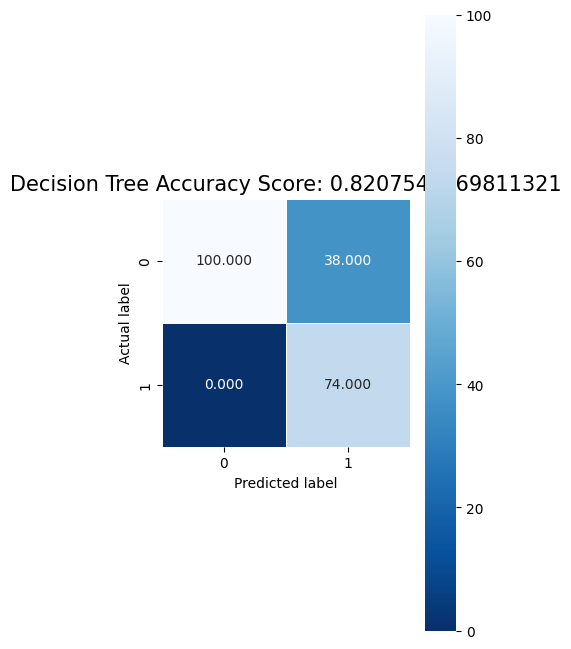

In [16]:
print('Nguyễn Thị Tường Vi-6351071077')
plt.figure(figsize = (4,8))
sns.heatmap(tree_cm, annot = True, fmt=".3f", linewidth =.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);
    

Nguyễn Thị Tường Vi - 6351071077


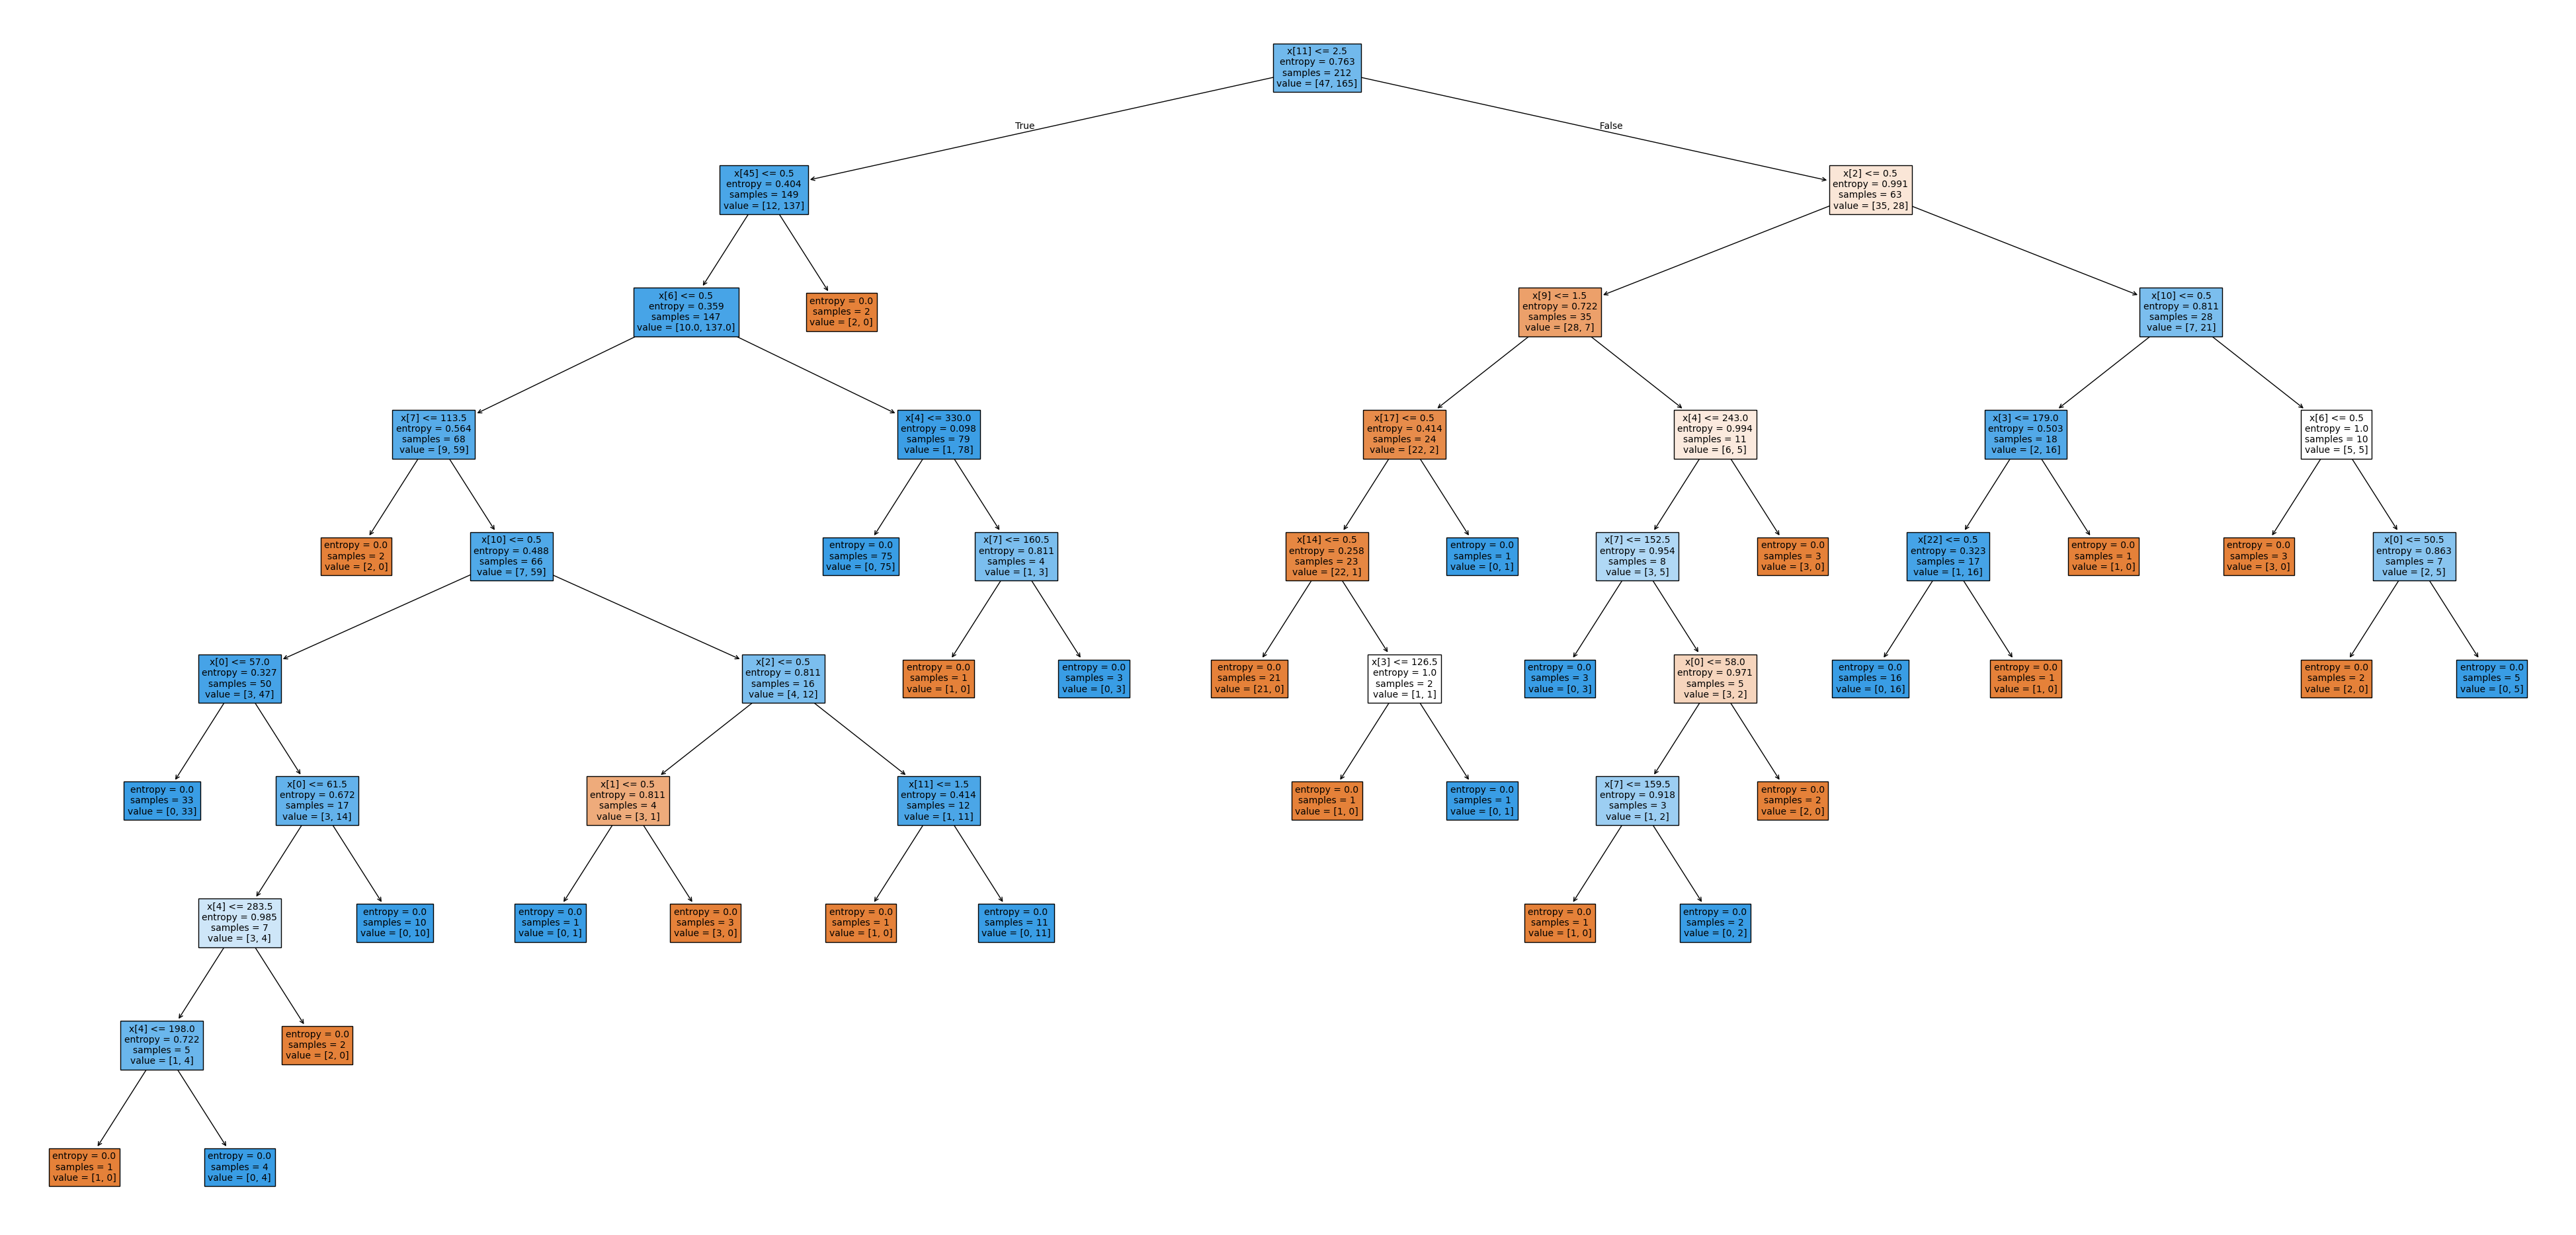

In [17]:
print('Nguyễn Thị Tường Vi - 6351071077')
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize = 10)
plt.savefig('decision_tree', dpi=100)
plt.show()


Số mẫu train: 212
Số mẫu test : 91


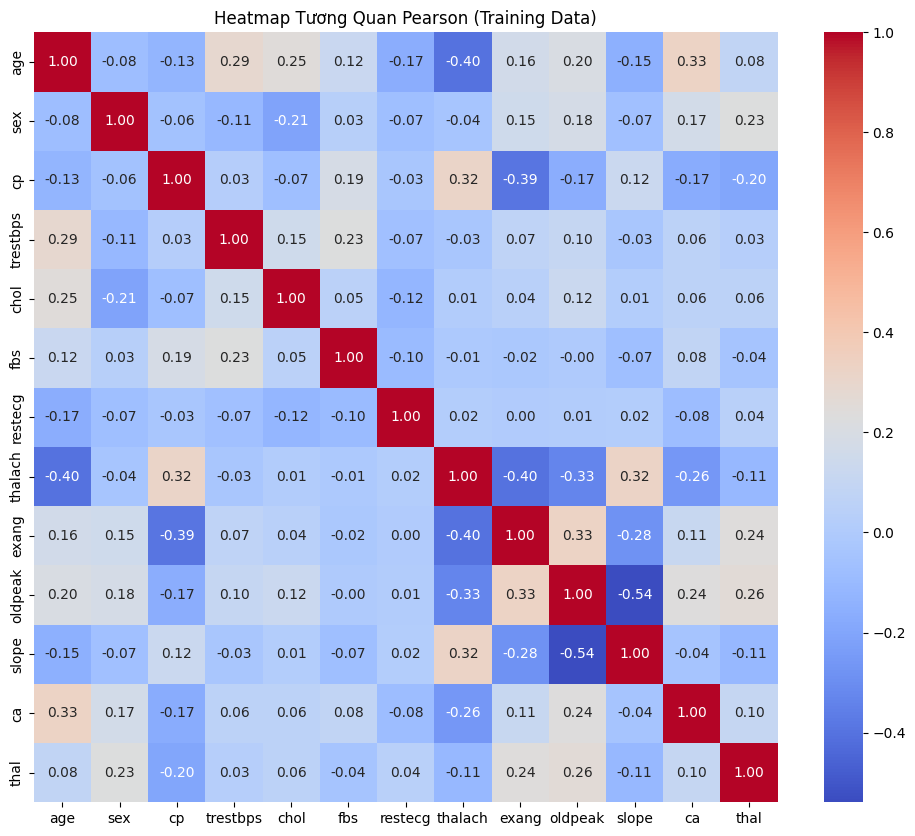

Confusion Matrix:
 [[29 12]
 [16 34]]


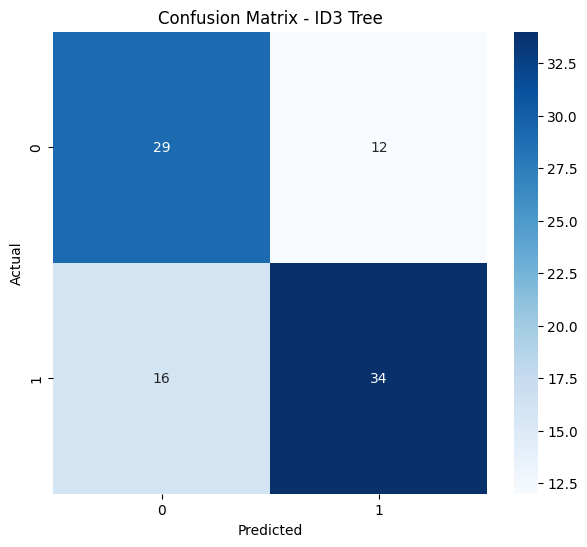


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.74      0.68      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91



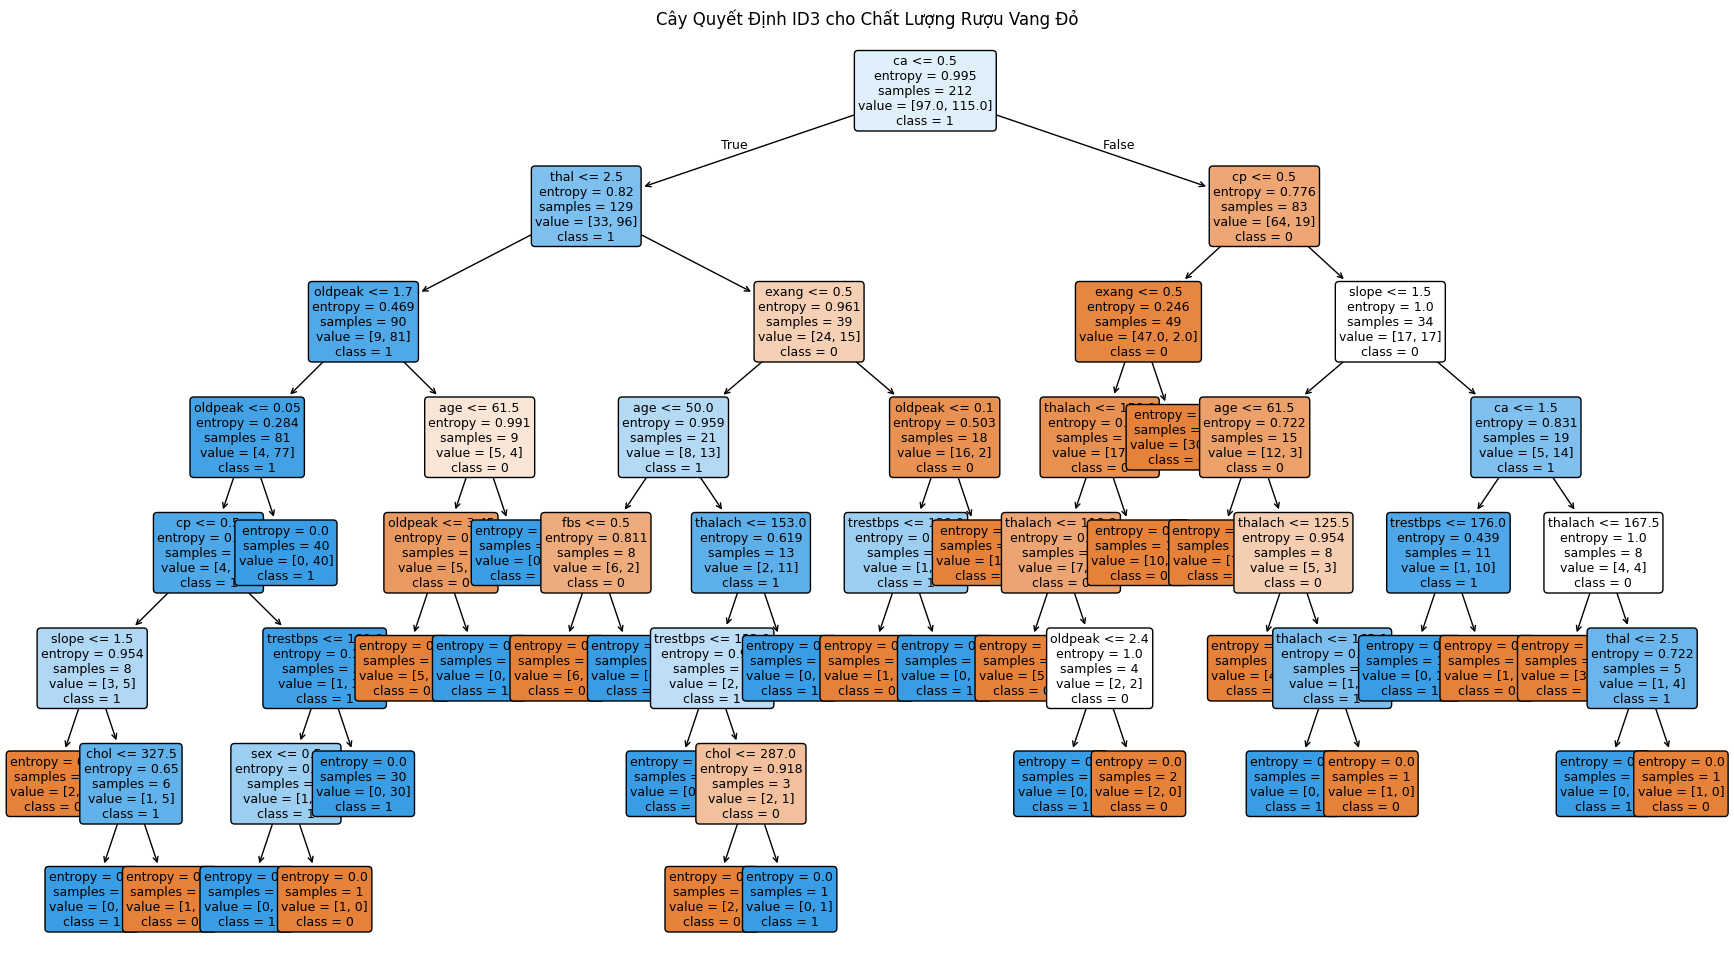

In [18]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print("Số mẫu train:", X_train.shape[0])
print("Số mẫu test :", X_test.shape[0])

correlation_matrix = X_train.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Tương Quan Pearson (Training Data)")
plt.show()

id3_tree = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)
id3_tree.fit(X_train, y_train)

y_pred = id3_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - ID3 Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(22, 12))
plot_tree(
    id3_tree,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Cây Quyết Định ID3 cho Chất Lượng Rượu Vang Đỏ")
plt.show()


In [19]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [20]:
print('Nguyễn Thị Tường Vi-6351071077')
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Nguyễn Thị Tường Vi-6351071077
Accuracy: 0.8351648351648352
Report:               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Nguyễn Thị Tường Vi - 6351071077


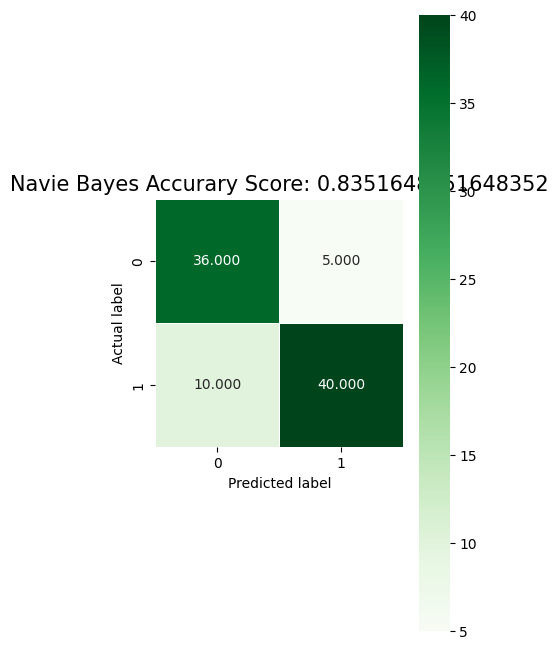

In [21]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
print('Nguyễn Thị Tường Vi - 6351071077')
plt.figure(figsize=(4,8))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Navie Bayes Accurary Score: {0}'.format(bayes_score)
plt.title(title, size = 15);